In [1]:
import numpy as np
import pandas as pd
import copy as cp
import statistics
import re
import math
import matplotlib.pyplot as plt 
from itertools import combinations
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt
from  collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import time
import csv
from sklearn.linear_model import LinearRegression
from datetime import datetime
import random
import plotly.express as px
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Projet Dm Partie 2

## Pretraitement

In [2]:
dataset1 = np.genfromtxt('Dataset1.csv', delimiter=',', dtype=float, skip_header=1)
header = np.genfromtxt('Dataset1.csv', delimiter=',', dtype=str, max_rows=1)
name_attribut={i:f"{n}" for i,n in enumerate(header)}
print(name_attribut)
pd.DataFrame(dataset1, columns=header)

{0: 'N', 1: 'P', 2: 'K', 3: 'pH', 4: 'EC', 5: 'OC', 6: 'S', 7: 'Zn', 8: 'Fe', 9: 'Cu', 10: 'Mn', 11: 'B', 12: 'OM', 13: 'Fertility'}


,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138.0,8.6,560.0,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,1.2040,0.0
1,213.0,7.5,338.0,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,1.8232,0.0
2,163.0,9.6,718.0,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,1.9092,0.0
3,157.0,6.8,475.0,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,1.6168,0.0
4,270.0,9.9,444.0,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1.4792,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,276.0,9.2,370.0,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,0.8428,1.0
881,320.0,13.8,391.0,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,1.8404,2.0
882,264.0,10.3,475.0,7.49,0.74,0.88,10.56,0.45,7.36,1.87,10.63,0.63,1.5136,0.0
883,220.0,8.6,444.0,7.43,0.65,0.72,11.70,0.37,0.66,0.90,2.19,1.82,1.2384,0.0


In [3]:
def calcul_mediane(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    liste = cp.deepcopy(datasetCurrated)
    liste.sort()
    if liste.size % 2 !=0 :
      
        mediane=liste[((liste.size+1)//2) -1]
    else :
        mediane=(liste[(liste.size//2)-1]+liste[liste.size//2])/2
    return mediane
def val_manquante(attribut):
    L=[]
    for i in range(0,len(dataset1[:,attribut])):
        if not re.fullmatch(r"\d+\.(:?\d+)?", str(dataset1[i, attribut])):
            L.append(i)
    return L
def tendance_centrales_homeMade(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    moyenne2= datasetCurrated.sum() / datasetCurrated.shape[0]
    mediane2=calcul_mediane(attribut)
    unique_values, counts = np.unique(datasetCurrated, return_counts=True)
    Indicemax=np.where(counts == max(counts))[0]
    mode2=[unique_values[i] for i in Indicemax]

    return [moyenne2,mediane2,mode2]
def quartilles_homeMade(attribut):
    datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
    liste = cp.deepcopy(datasetCurrated)
    liste.sort()
    q0=liste[0]
    q1=(liste[liste.size//4-1]+liste[liste.size//4]) /2
    q3=(liste[liste.size*3//4-1]+liste[liste.size*3//4]) /2
    q2=calcul_mediane(attribut)
    q4=liste[-1]
    return [q0,q1,q2,q3,q4]
def ecart_type_home_made(attribut):
     datasetCurrated=np.delete( dataset1[:,attribut], val_manquante(attribut))
     mean = np.mean(datasetCurrated)
     ecarts = [(val - mean) ** 2 for val in datasetCurrated]
     variance = np.mean(ecarts) 
     return np.sqrt(variance)
    

In [4]:
def DiscretisationA(attribut):
    global dataset1
    vals=dataset1[:,attribut].copy()
    vals.sort()
    q = 1+(10/3)*np.log10(dataset1.shape[0])
    nbrelmt=math.ceil(dataset1[:,attribut].shape[0]/q)
    
    for  val in range(0,dataset1[:,attribut].shape[0]):  
        for i in range(0,vals.shape[0],nbrelmt):
            if(vals[i]>dataset1[val,attribut]):
                sup=i
                break
        dataset1[val,attribut]=np.median(vals[sup-nbrelmt:sup])  

In [5]:
# a.Choix de la méthode de remplacement des valeurs manquantes.
def remplacement_val_manquantes(methode,attribut):
    global dataset1
    missing=val_manquante(attribut)
    for i in missing:
        if methode==0:
            dataset1[i,attribut]= statistics.mode(dataset1[:,attribut])    
        else:
            dataset1[i,attribut]= np.mean([dataset1[j,attribut] for j in range(0,len(dataset1)) if dataset1[j,-1]==dataset1[i,-1] and not j in missing])

# b.Choix de la méthode de traitement des valeurs aberrantes
def remplacement_val_aberrantes(methode,attribut):
    global dataset1
    abberante=[]
    if methode==0:
        IQR=(quartilles_homeMade(attribut)[-2]-quartilles_homeMade(attribut)[1])*1.5
        for i in range(0,len(dataset1[:,attribut])):
            if (dataset1[i,attribut] >(quartilles_homeMade(attribut)[-2]+IQR) or dataset1[i,attribut]<(quartilles_homeMade(attribut)[1]-IQR)):
                abberante.append(i)
        X = np.delete(dataset1, attribut, axis=1)
        X = np.delete(X, abberante, axis=0)
        y=dataset1[:,attribut]
        y= np.delete(y, abberante, axis=0).reshape(-1, 1)

        model = LinearRegression().fit(X, y)
         
        for i in abberante:
            x2=np.delete(dataset1, attribut, axis=1)
            X_new =x2[i,:].T.reshape(1, -1)
            dataset1[i,attribut]=model.predict(X_new)[0][0]
    else:
         DiscretisationA(attribut)

def remplacement_manquant_generale(methode):
    for i in range(0,dataset1.shape[1]-1):
        remplacement_val_manquantes(methode,i) 

def remplacement_aberantes_generale(methode):
    for i in range(0,dataset1.shape[1]-1):
        remplacement_val_aberrantes(methode,i)   

In [6]:
def reduire_row():
     global dataset1
     print(len(dataset1))
     dataset1= np.unique(dataset1, axis=0, return_index=False)
     print(len(dataset1))
def coef_correl(attribut1,attribut2):
    moy1=np.mean(dataset1[:,attribut1])
    moy2=np.mean(dataset1[:,attribut2])
    e1=ecart_type_home_made(attribut1)
    e2=ecart_type_home_made(attribut2)
    return (dataset1[:,attribut1].dot(dataset1[:,attribut2])-(len(dataset1)*moy1*moy2))/((len(dataset1)-1)*(e1*e2))
def reduire_dim(treashold):
    global dataset1
    to_delete=[]
    for i in range(0,dataset1.shape[1]-1):
        for j in range(i+1,dataset1.shape[1]):
            if (np.abs(coef_correl(i,j))>treashold):
                print(i,j)
                to_delete.append(i)
    dataset1 = np.delete(dataset1,to_delete, axis=1)


In [7]:
def normalisation(methode,attribut):
    global dataset1
    if methode:
        vmin = 0
        vmax= 1
        vminOld=dataset1[:,attribut].min()
        vmaxOld=dataset1[:,attribut].max()
        for  val in range(0,dataset1[:,attribut].shape[0]):
            dataset1[val,attribut]=vmin+(vmax-vmin)*((dataset1[val,attribut]-vminOld)/(vmaxOld-vminOld))
    else:
        vmean=np.mean(dataset1[:,attribut])
        s=np.mean( (dataset1[:,attribut]  -vmean)**2)
        for  val in range(0,dataset1[:,attribut].shape[0]):
            dataset1[val,attribut]=(dataset1[val,attribut]-vmean)/s 
   
def normalisation_generale(methode):
    for i in range(0,dataset1.shape[1]-1):
        normalisation(methode,i)

In [8]:
remplacement_manquant_generale(1)
remplacement_aberantes_generale(0)   
reduire_row()
reduire_dim(0.75)
normalisation_generale(1)

885
882
5 12


In [9]:

def distance(instance1,instance2,methode):
    if methode==0:#minkowki et les autres
         return  1-(  ( np.sum([instance1[i]*instance2[i] for i in range(0,len(instance1))]))  /(math.sqrt(np.sum([i**2 for i in instance1]))*math.sqrt(np.sum([i**2 for i in instance2]))))
    else:#cosine
        return sum( np.abs(instance1-instance2)**methode)**(1/methode)

## 1. Analyse supervisée

In [10]:
#Séparer le dataset en données d’apprentissages et données de tests (80% par classe / 20% par classe, respectivement).

train = np.empty((0, dataset1.shape[1]), dtype=dataset1.dtype)
test = np.empty((0, dataset1.shape[1]), dtype=dataset1.dtype)
for i in set(dataset1[:,-1]):
    indices= np.where(dataset1[:,-1]==i)
    random.shuffle(indices)
    indicesTrain=list(indices[0])[:int(len(indices[0])*0.8)]
    indicesTest=list(indices[0])[int(len(indices[0])*0.8):]
    train = np.vstack((train, dataset1[indicesTrain, :]))
    test = np.vstack((test, dataset1[indicesTest, :]))

np.random.shuffle(train)
np.random.shuffle(test)

X_train=train[:,:-1]
Y_train=train[:,-1]
X_test= test[:,:-1]
Y_test= test[:,-1]

[[0.24624625 0.26717557 0.48202614 0.49541284 0.54666667 0.48728814
  0.28863127 0.46518375 0.29850746 0.36781609 0.60101664 0.01638452
  0.        ]
 [0.43543544 0.35114504 0.3627451  0.49541284 0.58666667 0.6539548
  0.19982165 0.344294   0.43781095 0.40334378 0.10171051 0.00210058
  0.        ]
 [0.28228228 0.32824427 0.65522876 0.55963303 0.45333333 0.7084408
  0.22202405 0.02901354 0.7960199  0.3077325  0.36986882 0.03444951
  0.        ]
 [0.3963964  0.35114504 0.18954248 0.50458716 0.54666667 0.15254237
  0.12581363 0.25435203 0.42288557 0.39811912 0.07397128 0.0079822
  0.        ]
 [0.43543544 0.29770992 0.27614379 0.47706422 0.22666667 0.2019774
  0.11841283 0.22727273 0.26368159 0.37826541 0.03698564 0.00210058
  0.        ]
 [0.3963964  0.35114504 0.27614379 0.55963303 0.44       0.78813559
  0.22202405 0.03094778 0.46268657 0.40020899 0.31240868 0.02856789
  0.        ]
 [0.         0.39694656 0.37908497 0.58715596 0.72       0.67937853
  0.19242084 0.41586074 0.60199005 0

In [11]:
X = dataset1[:, :-1]
Y = dataset1[:, -1].reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)
print(X_train[:10])

[[0.48948949 0.3129771  0.65522876 0.12844037 0.16       0.35946328
  0.38484169 0.51644101 0.49253731 0.62434692 0.21266743 0.0079822 ]
 [0.71771772 0.90076336 0.8627451  0.40833727 0.50666667 0.3170904
  0.22202405 0.41586074 0.24875622 0.60188088 0.23116025 0.02436673]
 [0.24624625 0.22900763 0.41339869 0.60550459 0.57333333 0.57274011
  0.32563527 0.81044487 0.26865672 0.82810867 0.24040666 0.03276905]
 [0.64264264 0.14503817 0.53431373 0.28440367 0.77333333 0.55155367
  0.25162726 0.42263056 0.38308458 0.41327064 0.21266743 0.04075125]
 [0.79279279 0.41221374 0.60294118 0.95412844 0.36       0.78531073
  0.13321443 0.29400387 0.26368159 0.39607279 0.50855254 0.04075125]
 [0.45345345 0.35114504 0.39705882 0.06422018 0.22666667 0.50847458
  0.29603207 0.38104449 0.61691542 0.74294671 0.24040666 0.04075125]
 [0.84984985 0.91603053 0.32679739 0.47969668 0.37333333 0.55155367
  0.32563527 0.30077369 0.49253731 0.4754441  0.24040666 0.04495241]
 [0.75375375 0.26717557 0.17156863 0.56226

### KNN

In [12]:
class KNN:
    def __init__(self,k,methode) -> None:
        self.k = k
        self.methode=methode
    def fit(self,xt,yt):
        self.Xtrain=xt
        self.Ytrain=yt    
    def _predict(self,Xtest):
        dist =  np.apply_along_axis(lambda x: distance(x, Xtest, self.methode), axis=1, arr=self.Xtrain)
        ind = np.argsort(dist)
        knn=self.Ytrain[ind[:self.k]]
        Y=statistics.mode(knn)
        return Y

### DT

In [13]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        #desicion node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        # leaf node
        self.value = value

In [14]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split, max_depth, info_gain_method, n_features=None):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.info_gain_method = info_gain_method
        
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth: #stopping conditions + decision node
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split and best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        #leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
    
        best_split = {}
        max_info_gain = -float("inf")
        
        if self.n_features is not None:
            feature_indices = np.random.choice(num_features, self.n_features, replace=False)
        else:
            feature_indices = range(num_features)
        
        for feature_index in feature_indices:
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]

                    curr_info_gain = self.information_gain(y, left_y, right_y, self.info_gain_method)

                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
      
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="Gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):

        Y = list(Y)
        return max(Y, key=Y.count)
    
    def fit(self, X, Y):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [15]:
DTClassifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3, info_gain_method="Gini")
DTClassifier.fit(X_train, Y_train)

In [16]:
y_pred = DTClassifier.predict(X_test) 
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy Desicion Tree : {accuracy}")
report = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy Desicion Tree : 0.8813559322033898
[[ 53   4   0]
 [  6 102   2]
 [  0   9   1]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        57
         1.0       0.89      0.93      0.91       110
         2.0       0.33      0.10      0.15        10

    accuracy                           0.88       177
   macro avg       0.71      0.65      0.66       177
weighted avg       0.86      0.88      0.87       177



### Random Forest

In [17]:
class RandomForestClassifier:
    def __init__(self, n_trees, max_depth, min_samples_split, n_features, info_gain_method):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []
        self.info_gain_method = info_gain_method

    def fit(self, X, Y):
        for i in range(self.n_trees):
            # Create a sub-dataset randomly
            subset_indices = np.random.choice(len(X), len(X), replace=True)
            subset_X = X[subset_indices, :]
            subset_Y = Y[subset_indices]

            # compute the decision tree of the sub-dataset
            tree = DecisionTreeClassifier(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_features=self.n_features,
                info_gain_method=self.info_gain_method
            )
            tree.fit(subset_X, subset_Y)

            self.trees.append(tree) #add it to the forest

    def predict(self, X):
        tree_predictions = [tree.predict(X) for tree in self.trees]

        #predict using majority voting 
        predictions = np.array(tree_predictions).T.astype(int)
        final_predictions = [np.argmax(np.bincount(prediction)) for prediction in predictions]

        return final_predictions


In [18]:
random_forest = RandomForestClassifier(n_trees=30, max_depth=3, min_samples_split=3, n_features=6, info_gain_method="Gini")
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)

In [19]:
y_pred = random_forest.predict(X_test) 
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy Random Forest : {accuracy}")
report = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy Random Forest : 0.8983050847457628
[[ 55   2   0]
 [  6 104   0]
 [  0  10   0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        57
         1.0       0.90      0.95      0.92       110
         2.0       0.00      0.00      0.00        10

    accuracy                           0.90       177
   macro avg       0.60      0.64      0.62       177
weighted avg       0.85      0.90      0.87       177



c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

### Matrice confusion

In [35]:
#execution knn
knns = KNeighborsClassifier(n_neighbors=3)
knns.fit(train[:,:-1],train[:,-1])

knnTP5 = KNN(3,2)
knnTP5.fit(train[:,:-1],train[:,-1]) 

y_pred=[]
y_predSK=[]
for i in test[:,:-1]:
    y_predSK.append(knns.predict(i.reshape(1,-1)))
    y_pred.append(knnTP5._predict(i))

In [21]:
accuracy = accuracy_score(test[:,-1], y_predSK)
print(f"Accuracy knn predef: {accuracy}")
accuracy = accuracy_score(test[:,-1], y_pred)
print(f"Accuracy knn inou: {accuracy}")
report = classification_report(test[:,-1], y_pred)
conf_matrix = confusion_matrix(test[:,-1], y_pred)
print(conf_matrix)
print("\nClassification Report:\n", report)

Accuracy knn predef: 0.6910112359550562
Accuracy knn inou: 0.6910112359550562
[[36 45  0]
 [ 0 85  4]
 [ 0  6  2]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.62        81
         1.0       0.62      0.96      0.76        89
         2.0       0.33      0.25      0.29         8

    accuracy                           0.69       178
   macro avg       0.65      0.55      0.55       178
weighted avg       0.78      0.69      0.67       178



[[36 45  0]
 [ 0 85  4]
 [ 0  6  2]]
accuracy global 0.6910112359550562
recall global 0.5498335414065751
precision global 0.6527777777777778
specificité global 0.8011456267900418
f1 score gloabl 0.5522181522181523
recall [0.44444444 0.95505618 0.25      ]
precision [1.         0.625      0.33333333]
taux fp [0.         0.57303371 0.02352941]
specificité [1.         0.42696629 0.97647059]
f1 score [0.61538462 0.75555556 0.28571429]


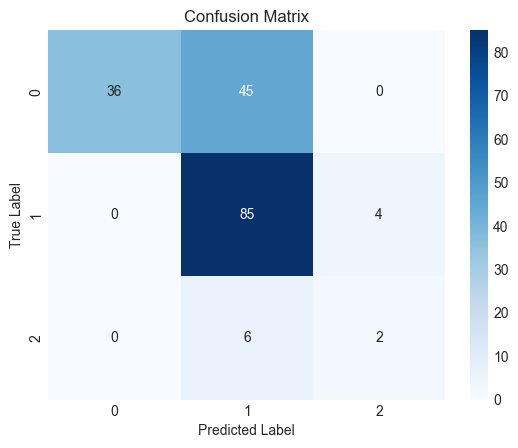

In [37]:
#   TODO  temps moyen d'exécution.
def matriceConfusion(y_test, y_pred):
    N = len(np.unique(y_test)) 
    M= np.zeros((N,N),dtype=int)
    for i in range(0,y_test.shape[0]) : 
        M[int(y_test[i])][int(y_pred[i])] += 1    
    return M

def Values(m):
    TP= m.diagonal()
    FP = m.sum(axis=0) - TP
    FN = m.sum(axis=1) - TP
    TN =  m.sum() - (TP + FN + FP)
    return TP, FN, FP, TN
def recall_score(TP, FN):
    return TP/(TP+FN)
def precision_score(TP, FP):
    return TP/(TP+FP)
def tauxFP(FP, TN):
    return  FP/(FP+TN)
def specificity_score(TN, FP):
    return TN/(TN+FP)
def Accuracy_score():
    return np.sum(M.diagonal())/np.sum(M)#(TP+TN)/( TP+TN + FP + FN)
def f1_score(TP,FP,FN):
    if any(recall_score(TP, FN)+precision_score(TP, FP))==np.nan:
        return 0
    return 2*(recall_score(TP, FN)*precision_score(TP, FP))/(recall_score(TP, FN)+precision_score(TP, FP))

M=matriceConfusion(test[:,-1], y_pred)
print(M)
TP, FN, FP, TN=Values(M)
print(f"accuracy global {np.mean(Accuracy_score())}")
print(f"recall global {np.mean(recall_score(TP, FN))}")
print(f"precision global {np.mean(precision_score(TP,FP))}")
print(f"specificité global {np.mean(specificity_score(TN,FP))}")
print(f"f1 score gloabl {np.mean(f1_score(TP,FP,FN))}")

print(f"recall {recall_score(TP, FN)}")
print(f"precision {precision_score(TP,FP)}")
print(f"taux fp {tauxFP(FP, TN)}")
print(f"specificité {specificity_score(TN,FP)}")
print(f"f1 score {f1_score(TP,FP,FN)}")
sns.heatmap(M, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Comparaison

## 2. Analyse non supervisée

In [23]:
dataset1=dataset1[:,:-1]

### K means

In [24]:
class K_MEANS:
    def __init__(self,k,methode_d,methode_c,max_iterations) -> None:
        self.k = k
        self.centroid=[]
        self.dataset_letiqu = np.hstack((dataset1.copy(), -1*np.ones((dataset1.shape[0], 1))))
        self.methode_c=methode_c
        self.methode_d=methode_d
        self.max_iterations=max_iterations
    def fit(self,xt):
        self.Xtrain=xt
    def centroid_selection(self,methode):
        if methode==0:#random sans prendre le meme
            self.centroid.extend(self.Xtrain[random.sample(range(self.Xtrain.shape[0]), self.k),:])   
        elif methode==1:#better picking
            self.centroid.append(list(self.Xtrain[np.random.choice(self.Xtrain.shape[0]),:]))
            dist =  np.apply_along_axis(lambda x: distance(x, self.centroid[0], self.methode_d), axis=1, arr=self.Xtrain)
            ind = np.argsort(dist)
            for i in range(self.k,0,-1):
                self.centroid.append(list(self.Xtrain[ind[int((len(ind)/self.k)*i )-1],:]))
    
    def _cluster(self):#instance
        #choose centroid 
        self.centroid_selection(self.methode_c)  
        #boucle
        change=True
        nbr_iteration=0
        while(change):
        #distance
            for j in range(self.Xtrain.shape[0]):
                distances=[]
                for i in range(self.k):
                    distances.append(distance(instance1= self.centroid[i], instance2= self.Xtrain[j,:] ,methode=self.methode_d))
                #affectation
                c =np.argmin(distances)
                self.dataset_letiqu[j,-1]=c
            #maj centroid
            oldcentroid=self.centroid.copy()
            for i in range(self.k):
                cluster=np.array([row[:-1] for row in self.dataset_letiqu if row[-1]==i])
                self.centroid[i]=np.array([np.average(cluster[:,j]) for j in range(cluster.shape[1])] )

            #print(type(centroid))
            if np.linalg.norm(np.array(self.centroid) - np.array(oldcentroid)) < 0.0001 or nbr_iteration>self.max_iterations:
                change=False
            nbr_iteration+=1
        return self.dataset_letiqu
    #bonus
    def _prediction(self,instance):
        distances=[]
        for i in range(self.k):
            distances.append(distance(self.centroid[i],instance,self.methode_d ))
        return np.argmin(distances),np.array([row[:-1] for row in self.dataset_letiqu if row[-1]==np.argmin(distances)])

- Silhouette


In [25]:
def silhouette_scorec(data, labels, metric):
    num_points = len(data)
    unique_labels = np.unique(labels)
    silhouette_values = np.zeros(num_points)

    intra_cluster_distances = np.zeros(num_points)
    inter_cluster_distances = np.zeros(num_points)

    for i in range(num_points):
        #ai
        label_i = labels[i]
        cluster_i_indices = np.where(labels == label_i)[0] # get own cluster points
        if len(cluster_i_indices) == 1:
            silhouette_i = 0  # Set silhouette score to 0 for single point clusters
        else:
            a_i = np.mean([distance(data[i],data[j],metric) for j in cluster_i_indices if j != i])
            inter_cluster_distances[i] = a_i

            #bi
            b_i_values = []
            for label_j in unique_labels:
                if label_j != label_i:
                    cluster_j_indices = np.where(labels == label_j)[0] # get neighbor clusters points
                    b_ij = np.mean([distance(data[i], data[j], metric) for j in cluster_j_indices])
                    b_i_values.append(b_ij)
            
            # get the average distance to the nearest neighbor cluster bi
            b_i = min(b_i_values) if b_i_values else 0
            intra_cluster_distances[i] = b_i

            # silhouette score of the point i
            silhouette_i = (b_i - a_i) / max(a_i, b_i)
            
        silhouette_values[i] = silhouette_i
            
    # silhouette score of data
    silhouette_score_avg = np.mean(silhouette_values)
    
    # Calculate overall intra-cluster and inter-cluster distances
    intra_distance = np.sum(intra_cluster_distances)
    inter_distance = np.sum(inter_cluster_distances)

    return silhouette_score_avg, intra_distance, inter_distance


### Experimentations

In [26]:
kmeans_home_made = K_MEANS(k=3,methode_d=1,methode_c=1,max_iterations=500)
kmeans_home_made.fit(dataset1)
res=kmeans_home_made._cluster()

prediction=kmeans_home_made._prediction([0.05705706 ,0.11450382 ,0.46568627, 0.67889908, 0.44 ,      0.3170904,
0.23682565, 0.36847195, 0.46766169, 0.67607106, 0.17568159,0.44    ])
print(prediction)

silhouette_avg = silhouette_score(dataset1, res[:,-1], metric='cosine')
print("silhouette score predef :", silhouette_avg)

score, intra_dist, inter_dist = silhouette_scorec(dataset1,res[:,-1], 0)
print("Silhouette Score Home made:", score)
print("intra distance = ", intra_dist)
print("inter distance = ", inter_dist)

# Applying k-means clustering
kmeans = KMeans(n_clusters=3,max_iter=300,init='random',tol=0.0001)
kmeans.fit(dataset1[:,:-1])
silhouette_avg = silhouette_score(dataset1,kmeans.labels_, metric='cosine')
print("silhouette score predef :", silhouette_avg)

score, intra_dist, inter_dist = silhouette_scorec(dataset1,kmeans.labels_, 0)
print("Silhouette Score Home made:", score)
print("intra distance = ", intra_dist)
print("inter distance = ", inter_dist)

(2, array([[0.00000000e+00, 3.96946565e-01, 3.79084967e-01, ...,
        3.20794148e-01, 2.12667426e-01, 4.49524120e-02],
       [3.90390390e-02, 2.29007634e-01, 3.79084967e-01, ...,
        4.24764890e-01, 1.10956918e-01, 8.40231999e-04],
       [3.90390390e-02, 3.12977099e-01, 3.26797386e-01, ...,
        4.67607106e-01, 2.95885115e-01, 2.05856840e-02],
       ...,
       [9.60960961e-01, 1.60305344e-01, 4.47712418e-01, ...,
        4.31034483e-01, 2.77392295e-02, 2.77276560e-02],
       [9.60960961e-01, 3.12977099e-01, 6.55228758e-01, ...,
        4.77011494e-01, 2.40406656e-01, 4.91535720e-02],
       [9.81981982e-01, 2.97709924e-01, 1.71568627e-01, ...,
        4.03866249e-01, 6.47248689e-02, 6.72185599e-03]]))
silhouette score predef : 0.12359757160391201
Silhouette Score Home made: 0.12359757160391201
intra distance =  134.17284915877417
inter distance =  115.46074826049906


c:\Users\Asus Zenbook Flip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score predef : 0.20579062783910765
Silhouette Score Home made: 0.2057906278391077
intra distance =  142.63325324708194
inter distance =  110.19424049572781


### DBSCAN

In [27]:
class Point:
    def __init__(self, instance):
        self.instance=instance
        self.marked=False
        self.cluster=False
        
   
def Voisinage(P,radius,methode_d):
    voisins=[]
    for i in range(dataset1.shape[0]):
        if  distance(dataset1[i,:],P.instance,methode_d) <=radius:
            voisins.append(i)
    return voisins

def DB_Scan(radius,min_points,methode_d):
    C = 0
    Outlier=[]
    dataset_labeled=[]
    listeP=[ Point(instance) for instance in dataset1[:,:]]
    
    for P in listeP:
        if not P.marked:
            P.marked=True
            PtsVoisins = Voisinage(P, radius,methode_d) 
            if len(PtsVoisins) < min_points :
                Outlier.append(P)
                dataset_labeled.append(np.append(P.instance,-1)) 
            else:
                C+=1 #new cluster
                P.instance=np.append(P.instance,C)
                P.cluster=True 
                dataset_labeled.append(P.instance)
                for i in PtsVoisins:
                    if not listeP[i].marked :
                        listeP[i].marked=True
                        v=Voisinage(listeP[i], radius,methode_d)
                        if len(v) >= min_points :
                            PtsVoisins.extend(v) 
                    if (not listeP[i].cluster) : 
                        listeP[i].cluster=True
                        if listeP[i] in Outlier:
                            Outlier.remove(listeP[i])
                            for j in range(len(dataset_labeled)):
                                if  np.array_equal( dataset_labeled[j][:-1],listeP[i].instance):
                                    listeP[i].instance=np.append(listeP[i].instance,C)
                                    dataset_labeled[j][-1]=C 
                                    break                        
                        else: 
                            listeP[i].instance=np.append(listeP[i].instance,C)
                            dataset_labeled.append(listeP[i].instance)
        
    return [list(i[:-1]) for i in dataset_labeled ],[i[-1] for i in dataset_labeled ],([i for i in dataset_labeled if i[-1]==-1])

In [28]:
# Apply DBSCAN
a=DB_Scan(1.2,5,methode_d=2)
silhouette_avg = silhouette_score(np.array(a[0]), a[1], metric='euclidean')
print("silhouette score predef :", silhouette_avg)

score, intra_dist, inter_dist = silhouette_scorec(np.array(a[0]), a[1], 2)
print("Silhouette Score Home made:", score)
print("intra distance :", intra_dist)
print("inter distance :", inter_dist)

#DBSCAN PREDEF
# dbscan = DBSCAN(eps=1.2, min_samples=5)
# labels = dbscan.fit_predict(dataset1)
# silhouette_avg = silhouette_score(dataset1, labels, metric='cosine')
# print("silhouette score predef :", silhouette_avg)

# score = silhouette_scorec(dataset1, labels, 0)
# print("Silhouette Score Home made:", score)

silhouette score predef : 0.4578336826415826
Silhouette Score Home made: 0.45783368264158264
intra distance : 1471.4074568460408
inter distance : 794.1162462296825


### Exemples

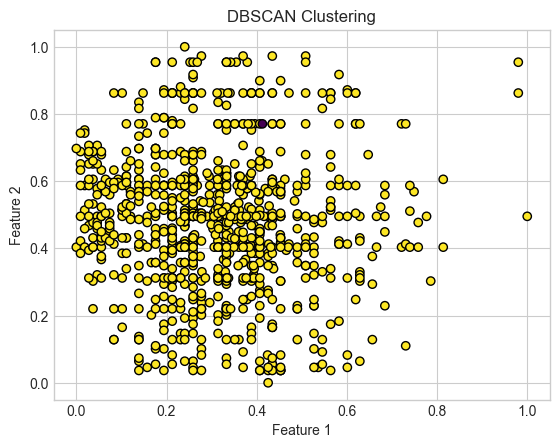

In [30]:
#a=DB_Scan(0.2,5,methode_d=2)
plt.scatter(dataset1[:, 10], dataset1[:, 3], c=a[1], cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

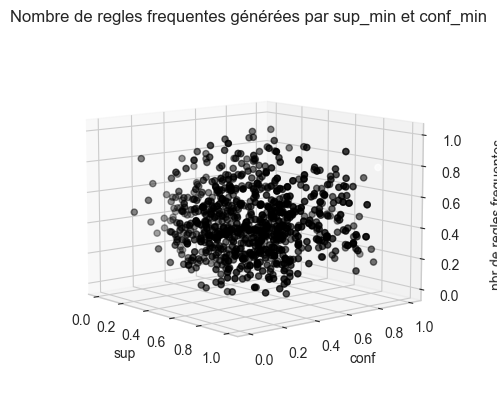

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

# Assuming you have X, Y, and Z defined
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Z = dataset1[:, 2].reshape(dataset1.shape[0], 1)
ax.scatter(dataset1[:, 0], dataset1[:, 1], Z, c=a[1], marker='o')

ax.set_xlabel('sup')
ax.set_ylabel('conf')
ax.set_zlabel('nbr de regles frequentes', labelpad=10)

ax.view_init(elev=10, azim=-40)
plt.title("Nombre de regles frequentes générées par sup_min et conf_min")
plt.show()


### Experimentations

### Comparaison